In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [16]:
reeses = cv2.imread('Computer-Vision-with-Python/DATA/reeses_puffs.png',0) 

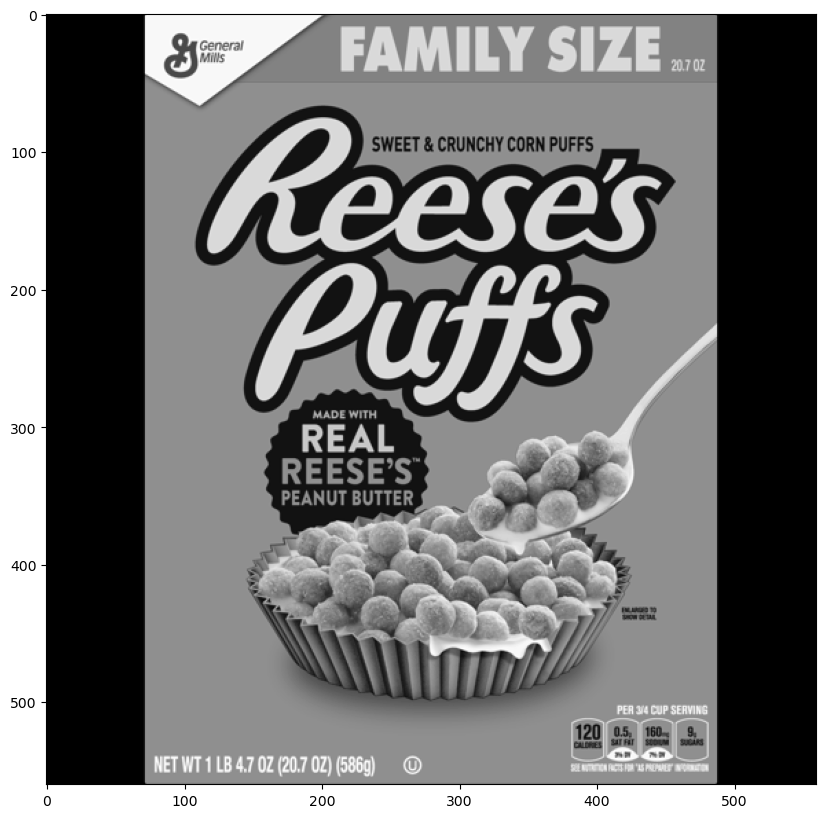

In [17]:
display(reeses)

In [18]:
cereals = cv2.imread('Computer-Vision-with-Python/DATA/many_cereals.jpg',0) 

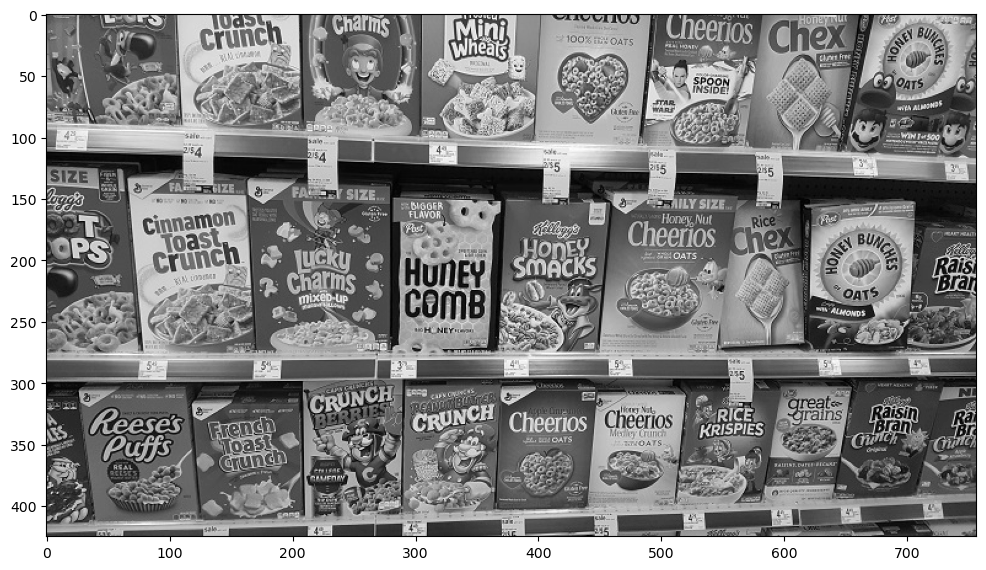

In [19]:
display(cereals)

# Brute Force Detection with ORB Descriptors

In [20]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 25 matches.
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

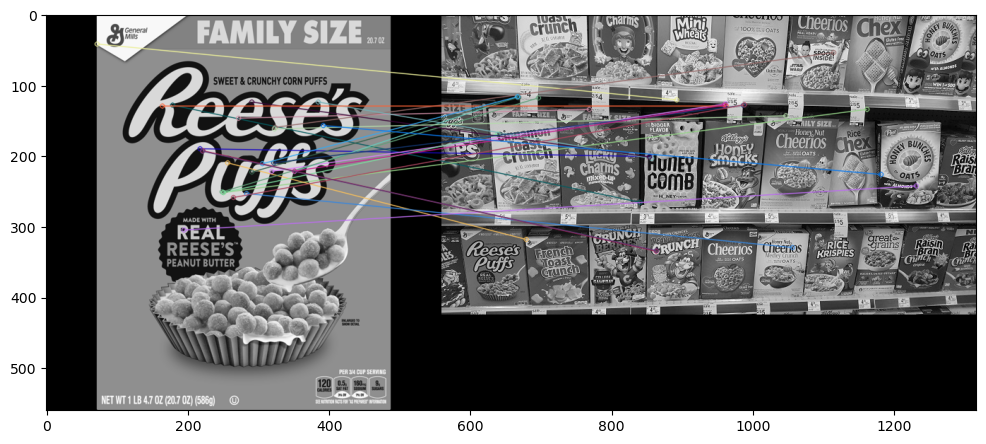

In [21]:
display(reeses_matches)

In [22]:
!pip install opencv-contrib-python


  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/a7/9e/7110d2c5d543ab03b9581dbb1f8e2429863e44e0c9b4960b766f230c1279/opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl (45.5 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\MSI KATANA\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



# Brute-Force Matching with SIFT Descriptors and Ratio Test

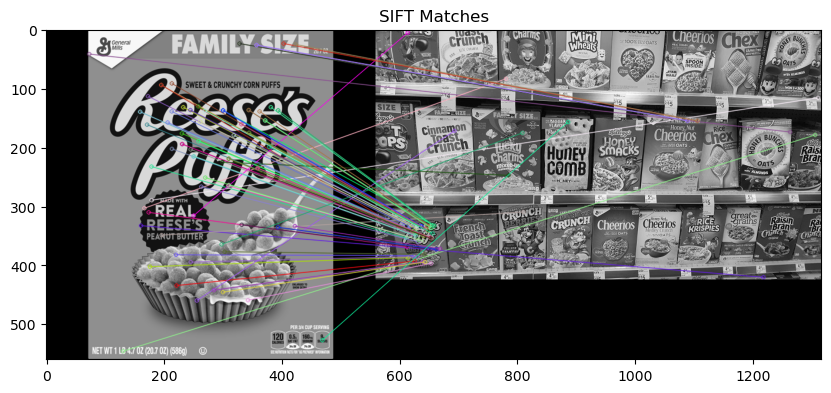

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create SIFT object
sift = cv2.SIFT_create()

# Load your images (make sure to have these images in your working directory)
reeses = cv2.imread('Computer-Vision-with-Python/DATA/reeses_puffs.png',0) 
cereals = cv2.imread('Computer-Vision-with-Python/DATA/many_cereals.jpg',0) 

# Check if the images are loaded properly
if reeses is None or cereals is None:
    raise ValueError("One or both images not found. Please check the file paths.")

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for match1, match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

# Draw matches
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

# Display the image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(sift_matches)
plt.title('SIFT Matches')
plt.show()


# FLANN based Matcher

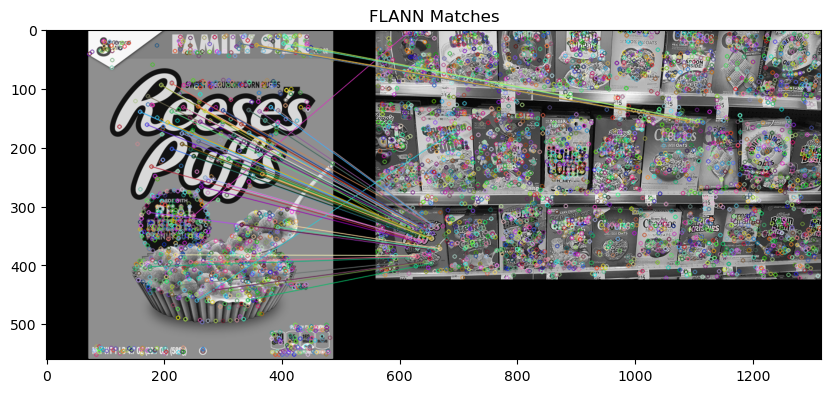

In [28]:
import cv2
import matplotlib.pyplot as plt

# Initiate SIFT detector
sift = cv2.SIFT_create()

# Load your images (ensure these images are in your working directory)
reeses = cv2.imread('Computer-Vision-with-Python/DATA/reeses_puffs.png',0) 
cereals = cv2.imread('Computer-Vision-with-Python/DATA/many_cereals.jpg',0) 


# Check if the images are loaded properly
if reeses is None or cereals is None:
    raise ValueError("One or both images not found. Please check the file paths.")

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

good = []

# Ratio test
for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7 * match2.distance:
        good.append([match1])

# Draw matches
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=0)

# Display the image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(flann_matches)
plt.title('FLANN Matches')
plt.show()


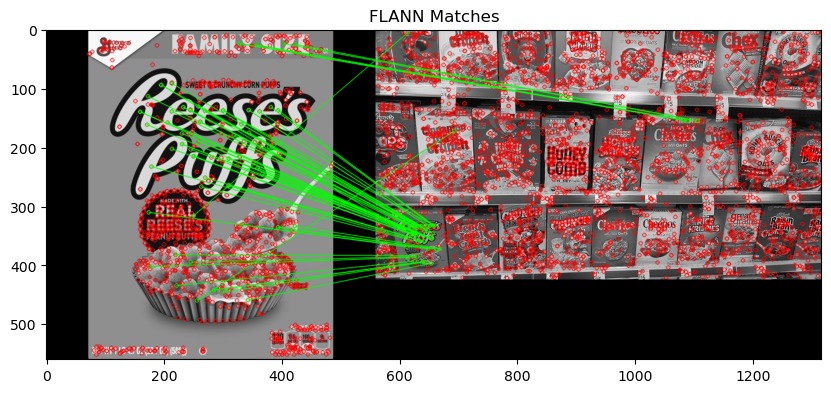

In [30]:
import cv2
import matplotlib.pyplot as plt

# Initiate SIFT detector
sift = cv2.SIFT_create()

# Load your images (ensure these images are in your working directory)
reeses = cv2.imread('Computer-Vision-with-Python/DATA/reeses_puffs.png',0) 
cereals = cv2.imread('Computer-Vision-with-Python/DATA/many_cereals.jpg',0) 

# Check if the images are loaded properly
if reeses is None or cereals is None:
    raise ValueError("One or both images not found. Please check the file paths.")

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0, 0] for i in range(len(matches))]

# Ratio test
for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7 * match2.distance:
        matchesMask[i] = [1, 0]

draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask,
                   flags=0)

flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)

# Display the image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(flann_matches)
plt.title('FLANN Matches')
plt.show()
